# 風管四 105308045 林庭萱
# 此次修改的部分
# 第一組模型:
1. 卷積層的filter(16, 128, 256)
   全連接層的神經元>128
# 第二組模型
1. 將神經元修改為128,100,50
   batch size改為200

In [ ]:
# 01 導入套件

In [1]:

import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

# 02 整理資料集 

In [2]:
# 導入資料集
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
#讀取資料
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

#標準化
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)


170500096/170498071 [==============================] - 37s 0us/step


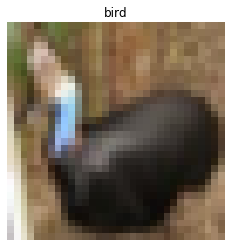

In [20]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

# 03 建立模型

修改部分
1. 卷積層的filter(16, 128, 256)
2. 全連接層的神經元>128

In [24]:
CNN_layers = [Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(256, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=128, activation='relu'),
             Dense(units=10, activation='softmax')]
model_1 = Sequential(CNN_layers+FC_layers)

In [25]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       18560     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 256)         295168    
_________________________________________________________________
global_average_pooling2d_5 ( (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

# 04 訓練模型 

In [26]:
model_1.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

In [28]:
model_1.fit(X_train, y_train, 
          batch_size=128, 
          epochs=10,
          validation_data=(X_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 154s 3ms/sample - loss: 0.9082 - categorical_accuracy: 0.6777 - val_loss: 0.9135 - val_categorical_accuracy: 0.6746
Epoch 2/10
50000/50000 [==============================] - 150s 3ms/sample - loss: 0.8858 - categorical_accuracy: 0.6876 - val_loss: 0.9132 - val_categorical_accuracy: 0.6773
Epoch 3/10
50000/50000 [==============================] - 163s 3ms/sample - loss: 0.8557 - categorical_accuracy: 0.6979 - val_loss: 0.8649 - val_categorical_accuracy: 0.6977
Epoch 4/10
50000/50000 [==============================] - 161s 3ms/sample - loss: 0.8247 - categorical_accuracy: 0.7079 - val_loss: 0.8371 - val_categorical_accuracy: 0.7043
Epoch 5/10
50000/50000 [==============================] - 151s 3ms/sample - loss: 0.7997 - categorical_accuracy: 0.7176 - val_loss: 0.8334 - val_categorical_accuracy: 0.7062
Epoch 6/10
50000/50000 [==============================] - 151s 3ms/sample - loss

# 05 建立另一個資料集

In [29]:
# 讀取資料
(U_train, v_train0), (U_test, v_test0) = datasets.cifar100.load_data()

# 資料標準化
U_train = U_train / U_train.max()
U_test = U_test / U_test.max()

# One-hot encoding
v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

169009152/169001437 [==============================] - 48s 0us/step


修改部分:
1. 將神經元修改為128,100,50

In [31]:
FC_layers_new  = [Dense(units=128, activation='relu'),
                  Dense(units= 100, activation='relu'),
                  Dense(units= 50, activation='relu'),
                  Dense(units=10, activation='softmax')]

In [32]:
#CNN層是借來的

new_model = Sequential(CNN_layers+FC_layers_new)

#檢視cnn曾是否確實被凍結
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       18560     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 256)         295168    
_________________________________________________________________
global_average_pooling2d_5 ( (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

# 06 遷移學習訓練_Frozen狀況

修改的部分
1. batch size改為200

In [33]:
for layer in CNN_layers:
    layer.trainable = False
new_model.summary()

new_model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

new_model.fit(X_train, y_train, 
          batch_size=200, 
          epochs=10,
          validation_data=(X_test, y_test)
          )

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       18560     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 256)         295168    
_________________________________________________________________
global_average_pooling2d_5 ( (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

# 結論: 準確率從0.7627提升至0.7955